In [ ]:
# run IPYNB that imports all the relevant packages and functions
%run ../ms_packages_and_functions.ipynb

In [2]:
output_dir = pjoin(os.getcwd(), 'processed_data')
data_dir   = pjoin(os.getcwd(), 'raw_data')


In [ ]:
run_path = pjoin(output_dir,'FN-metrics')

if not os.path.exists(run_path):
    os.mkdir(run_path)
    print("created directory: {}".format(run_path))
else:
    print("All files will be saved in: {}".format(run_path))

In [ ]:
fig_dir = pjoin(run_path,'figures')

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
    print("created directory: {}".format(fig_dir))
else:
    print("All files will be saved in: {}".format(fig_dir))

# Data Load and Meta data

In [5]:
GAS_data_fp = {'RS': {'cues':'processed_data/RS_temporal_all_gas.pkl',
                    'MO': 'processed_data/RS_temporal_all_gas_MO.pkl'},
            'RJ': {'cues': 'processed_data/RJ_temporal_all_gas.pkl',
                    'MO': 'processed_data/RJ_temporal_all_gas_MO.pkl'}}

In [6]:
all_gas_vals = {'RS':{'cues':{'data':[],'null':[]},
                        'MO':{'data':[],'null':[]}},
                'RJ':{'cues':{'data':[],'null':[]},
                        'MO':{'data':[],'null':[]}}}


for subject in ['RS','RJ']:
    for ty in ['cues','MO']:
        GAS_data = loadPickle(GAS_data_fp[subject][ty])
        for c in np.arange(5):
            status(f"Subject {subject}, type {ty}, circ distance: {c}")
            all_gas_vals[subject][ty]['null'].append([[np.mean(y[2]) for y in x[c]] for x in GAS_data])
            all_gas_vals[subject][ty]['data'].append([[np.mean(y[1]) for y in x[c]] for x in GAS_data])
            # all_gas_vals[subject]['norm'].append([[normalizeNetworkMetric(np.mean(y[1]),np.mean(y[2])) for y in x[c]] for x in GAS_data[subject]])


'Subject RJ, type MO, circ distance: 4'

Subject RS: type data, circ distance 1, time 0.21000000000000002s to 0.47s
Subject RS: type data, circ distance 4, time 0.16000000000000003s to 0.47s
Subject RS: type null, circ distance 1, time 0.22000000000000003s to 0.47s
Subject RS: type null, circ distance 4, time 0.16000000000000003s to 0.47s
Subject RJ: type data, circ distance 1, time 0.22999999999999998s to 0.47s
Subject RJ: type data, circ distance 4, time 0.18s to 0.47s
Subject RJ: type null, circ distance 1, time 0.22999999999999998s to 0.47s
Subject RJ: type null, circ distance 4, time 0.16000000000000003s to 0.47s


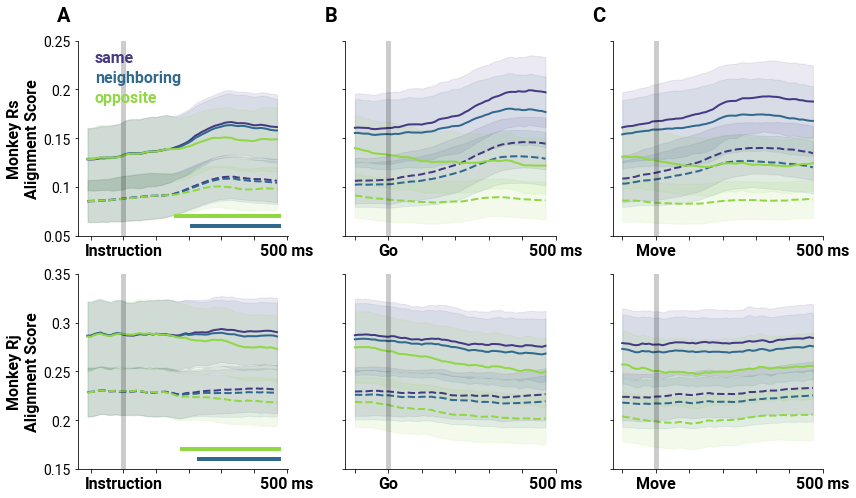

In [9]:
# sns.set_context("paper")
afont = {'fontname':'Roboto','fontsize' : 16,'weight':'bold'}
bfont = {'fontname':'Roboto','fontsize' : 14}
hfont = {'fontname':'Roboto','fontsize' : 20,'weight':'bold'}
cols = 3
rows = 2

subject_names = ['Monkey Rs', 'Monkey Rj']#'Monkey Bx']
fig = plt.figure(figsize=(12,7))


plot_num = 1
gas_bounds = [[0.05,0.25],[0.15,0.35]]
l=3
sig_vals = [[0.21,0.17],[0.27,0.18]] # [0 vs 1,0 vs 4]
sig_colors = []
subjects = ['RS', 'RJ']
for row,subject  in enumerate(subjects):

    for col in range(cols):
        ax = fig.add_subplot(rows,cols,plot_num)

        if col == 0:
            # GAS instruction
            start_time = time2bin(-0.1,lastBin=True)
            end_time = time2bin(0.48,lastBin=True)
            
            dist_vals = [0,1,4]
            cmap = sns.color_palette("viridis",5)
            legend_labels = ['same','neighboring','opposite']
            
            if row == 0 :
                for i,c in enumerate(dist_vals):
                    ty = 'data'
                    mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]
                    plt.plot(x,mean[start_time:end_time],c=cmap[c],linewidth=2,label=legend_labels[i])
                    plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)

                    ty = 'null'
                    mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]
                    plt.plot(x,mean[start_time:end_time],'--',c=cmap[c],linewidth=2)
                    plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
            else:
                for c in dist_vals:
                    ty = 'data'
                    mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]
                    plt.plot(x,mean[start_time:end_time],c=cmap[c],linewidth=2)
                    plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
                    
                    ty = 'null'
                    mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                    x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]
                    plt.plot(x,mean[start_time:end_time],'--',c=cmap[c],linewidth=2)
                    plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
            
            ax.plot([0,0],gas_bounds[row],'k', linewidth=5, alpha=0.2)
            ticks = np.arange(-0.1,0.6,0.1)

            # significance:
            buffer = 0.01
            c_a = 0
            ty='data'
            comp_pairs = [1,4]
            x = [bin2time(x,lastBin=True) for x in range(start_time,end_time)]
            for i, c_b in enumerate(comp_pairs):
                p = [stats.mannwhitneyu(all_gas_vals[subject]['cues'][ty][c_a][t],all_gas_vals[subject]['cues'][ty][c_b][t])[1] for t in range(start_time,end_time)]
                p_corr = multipletests(p,0.01,method='bonferroni') 
                for x0,x1 in zip(first_and_last_seq(p_corr[0],True)[0],\
                            first_and_last_seq(p_corr[0],True)[1]):
                    plt.plot([x[x0],x[x1]+0.005],[gas_bounds[row][0]+buffer*(i+1),gas_bounds[row][0]+buffer*(i+1)],c=cmap[c_b],linewidth=4)
                    print(f'Subject {subject}: type {ty}, circ distance {c_b}, time {x[x0]}s to {x[x1]}s')
                # print(p_corr[1])

            ty='null'
            comp_pairs = [1,4]
            x = [bin2time(x,lastBin=True) for x in range(start_time,end_time)]
            for i, c_b in enumerate(comp_pairs):
                p = [stats.mannwhitneyu(all_gas_vals[subject]['cues'][ty][c_a][t],all_gas_vals[subject]['cues'][ty][c_b][t])[1] for t in range(start_time,end_time)]
                p_corr = multipletests(p,0.01,method='bonferroni') 
                for x0,x1 in zip(first_and_last_seq(p_corr[0],True)[0],\
                            first_and_last_seq(p_corr[0],True)[1]):

                    print(f'Subject {subject}: type {ty}, circ distance {c_b}, time {x[x0]}s to {x[x1]}s')
                # print(p_corr[1])


            if row == 0:
                leg = ax.legend(frameon=False, handlelength=0,loc='upper left')
                
                for h, t in enumerate(leg.get_texts()):
                    t.set_color(cmap[dist_vals[h]])
                    t.set_weight("bold")
                    t.set_size(16) 

            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Instruction'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")

            plt.ylabel('Alignment Score',**afont)
            ax.set_ylabel(f'{subject_names[row]}\nAlignment Score', multialignment='center',**afont)
            ticks = np.arange(gas_bounds[row][0],gas_bounds[row][1]+0.02,0.05)
            labels = [round(x,2)  for x in ticks]
            ax.set_yticks(ticks)
            ax.set_yticklabels(labels,**bfont)

            
            plt.ylim(gas_bounds[row])
            sns.despine(ax=ax)
            
        if col == 1:
            # GAS GO
            start_time = time2bin(0.9,lastBin=True)
            end_time = time2bin(1.48,lastBin=True)
            
            dist_vals = [0,1,4]
            cmap = sns.color_palette("viridis",5)
            x = [bin2time(x,lastBin=True)-1 for x in np.arange(start_time,end_time)]
            for c in dist_vals:

                ty = 'data'
                mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                plt.plot(x,mean[start_time:end_time],c=cmap[c],linewidth=2)
                plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
                
                ty = 'null'
                mean = np.array([np.mean(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                err = np.array([np.std(x) for x in all_gas_vals[subject]['cues'][ty][c]])
                plt.plot(x,mean[start_time:end_time],'--',c=cmap[c],linewidth=2)
                plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)

            ax.plot([0,0],gas_bounds[row],'k', linewidth=5, alpha=0.2)
            ticks = np.arange(-0.1,0.6,0.1)
                
            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Go'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")
            # print(plt.gca().get_ylim())
            ticks = np.arange(gas_bounds[row][0],gas_bounds[row][1]+0.02,0.05)
            labels = [round(x,2)  for x in ticks]
            ax.set_yticks(ticks)    
            ax.set_yticklabels([])
            plt.ylim(gas_bounds[row])
            sns.despine(ax=ax)
            
        if col == 2:
            # GAS MO
            
            start_time = time2bin(-0.1,lastBin=True,buffer=0.5)
            end_time = time2bin(0.48,lastBin=True,buffer=0.5)
            
            dist_vals = [0,1,4]
            cmap = sns.color_palette("viridis",5)
            
            for c in dist_vals:
                x = [bin2time(x,lastBin=True,buffer=0.5) for x in np.arange(start_time,end_time)]
                ty = 'data'
                mean = np.array([np.mean(x) for x in all_gas_vals[subject]['MO'][ty][c]])
                err = np.array([np.std(x) for x in all_gas_vals[subject]['MO'][ty][c]])
                plt.plot(x,mean[start_time:end_time],c=cmap[c],linewidth=2)
                plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
                
                ty = 'null'
                mean = np.array([np.mean(x) for x in all_gas_vals[subject]['MO'][ty][c]])
                err = np.array([np.std(x) for x in all_gas_vals[subject]['MO'][ty][c]])
                plt.plot(x,mean[start_time:end_time],'--',c=cmap[c],linewidth=2)
                plt.fill_between(x,(mean-err)[start_time:end_time],(mean+err)[start_time:end_time],color=cmap[c],alpha=0.1)
            ax.plot([0,0],gas_bounds[row],'k', linewidth=5, alpha=0.2)
            ticks = np.arange(gas_bounds[row][0],gas_bounds[row][1]+0.02,0.05)
            labels = [round(x,2)  for x in ticks]
            ax.set_yticks(ticks)    
            ax.set_yticklabels([])
            ax.set_yticklabels([])
            plt.ylim(gas_bounds[row])
            
            ticks = np.arange(-0.1,0.6,0.1)
            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Move'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")

            sns.despine(ax=ax)
        if row==0:    
            ax.text(-0.1, 1.1, string.ascii_uppercase[plot_num-1], transform=ax.transAxes, 
            size=20, weight='bold')  
        plot_num += 1

plt.tight_layout()
# plt.savefig(pjoin(fig_dir,'temporal_network-GAS-letters-subject-01.png'))

# For Supplementary Fig: with normalized

In [12]:
GAS_data = {'RS': loadPickle('processed_data/RS_temporal_all_gas.pkl'),
            'RJ': loadPickle('processed_data/RJ_temporal_all_gas.pkl')}

In [13]:
trials_by_cutoff = {'RS':loadPickle('processed_data/paper-extra-analysis/data/rs1050225_trials_by_cutoff.pkl'),
                    'RJ':loadPickle('processed_data/paper-extra-analysis/data/rj031209_trials_by_cutoff.pkl')}

In [14]:
all_gas_vals = {'RS':{'data':[],'null':[],'norm':[]},
                'RJ':{'data':[],'null':[],'norm':[]}}

for subject in ['RS','RJ']:
    for c in np.arange(5):
        status(f"Subject {subject}, circ distance: {c}")
        all_gas_vals[subject]['null'].append([[np.mean(y[2]) for y in x[c]] for x in GAS_data[subject]])
        all_gas_vals[subject]['data'].append([[np.mean(y[1]) for y in x[c]] for x in GAS_data[subject]])
        all_gas_vals[subject]['norm'].append([[normalizeNetworkMetric(np.mean(y[1]),np.mean(y[2])) for y in x[c]] for x in GAS_data[subject]])


'Subject RJ, circ distance: 4'

In [15]:
y_bounds = [0.02, 0.04]

In [ ]:
sns.set_context('talk')
afont = {'fontname':'Roboto','fontsize' : 18,'weight':'bold'}
bfont = {'fontname':'Roboto','fontsize' : 14}
hfont = {'fontname':'Roboto','fontsize' : 20,'weight':'bold'}
plt.figure(figsize=(10,5))
plot_num = 1
rows = 1
cols = 2
cmap = sns.color_palette("viridis",5)
comp_pairs = [1,2,3,4]
c_a = 0
buffer = 0.005
y_interval = 0.02
y_buffer = 0.001
legend_labels = ['$\Delta$0', '$\Delta$45', '$\Delta$90', '$\Delta$135','$\Delta$180']
titles = ['Monkey Rs','Monkey Rj']


for subject in ['RS','RJ']:
    for j,ty in enumerate(['norm']):
        ax = plt.subplot(rows,cols,plot_num)
        ax.text(-0.1, 1.1, string.ascii_uppercase[plot_num-1], transform=ax.transAxes, size=20, weight='bold')
        min = 1
        for c in range(5):
            mean = np.array([np.mean(x) for x in all_gas_vals[subject][ty][c]])
            err = np.array([np.std(x) for x in all_gas_vals[subject][ty][c]])
            x = [bin2time(x,lastBin=True) for x in np.arange(len(mean))]
            plt.plot(x,mean,c=cmap[c],linewidth=2,label=legend_labels[c])
            plt.fill_between(x,mean-err,mean+err,color=cmap[c],alpha=0.1)
            if np.min(mean-err)<min:
                min = np.min(mean-err)
        stats
        ylim = y_bounds[plot_num-1]-0.018#plt.gca().get_ylim()
        for i, c_b in enumerate(comp_pairs):

            p = [stats.mannwhitneyu(all_gas_vals[subject][ty][c_a][t],all_gas_vals[subject][ty][c_b][t])[1] for t in range(len(all_gas_vals[subject][ty][c_a]))]
            p_corr = multipletests(p,0.01,method='bonferroni') 
            for x0,x1 in zip(first_and_last_seq(p_corr[0],True)[0],\
                        first_and_last_seq(p_corr[0],True)[1]):
                plt.plot([x[x0],x[x1]+0.005],[ylim+buffer*(i+1),ylim+buffer*(i+1)],c=cmap[c_b],linewidth=3)
                print(f'Subject {subject}: type {ty}, circ distance {c_b}, time {x[x0]}s to {x[x1]}s')
            # print(p_corr[1])
        if ty =='data':
            plt.xlabel('time from instruction cue (s)',**afont)
            plt.ylabel(f'Subject {subject}\nGAS',**afont)

        plt.xlim([-0.2,1.5])

        if ty == 'norm':
            y_buffer=0.05
        else:
            y_buffer=0.09

        ylim_plot = plt.gca().get_ylim()
        print(ylim_plot)
        # ylim = plt.gca().get_ylim()



        mid_point = round(np.mean([ylim_plot[1],ylim_plot[0]]),2)
        # if subject=='RJ':
        #     mid_point -= 0.02
        y_pm = (0.12/2)
        
        ticks = np.arange(mid_point-y_pm+0.03,mid_point+y_pm,0.02)

        labels = [round(x,2)  for x in ticks]
        print(ticks)
        ax.set_yticks(ticks)    
        ax.set_yticklabels(labels)

        plt.gca().set_yticks(ticks)
        plt.gca().set_yticklabels(labels)
        plt.ylim(np.min(ticks)-0.02,np.max(ticks))
        plt.title(f'{titles[plot_num-1]}',**hfont)
        if subject =='RS':
            plt.ylabel(" Normalized Graph Alignment Scores",**afont)
        plt.xlabel("time from instruction cue (s)")
        if plot_num ==2:
            plt.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
            
        sns.despine()
        plot_num += 1
plt.tight_layout()
plt.savefig(pjoin(fig_dir,'GAS_normalized-p01.png'))